In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Aravind\OneDrive\Documents\sem 4\myProjects\dhwani\Fatalities.csv')

In [3]:
df.head()

,rownames,state,year,spirits,unemp,income,emppop,beertax,baptist,mormon,...,nfatal2124,afatal,pop,pop1517,pop1820,pop2124,milestot,unempus,emppopus,gsp
0,1,al,1982,1.37,14.4,10544.152344,50.692039,1.539379,30.355700,0.32829,...,32,309.437988,3942002.25,208999.593750,221553.43750,290000.06250,28516.0,9.7,57.799999,-0.022125
1,2,al,1983,1.36,13.7,10732.797852,52.147030,1.788991,30.333599,0.34341,...,35,341.834015,3960008.00,202000.078125,219125.46875,290000.15625,31032.0,9.6,57.900002,0.046558
2,3,al,1984,1.32,11.1,11108.791016,54.168087,1.714286,30.311501,0.35924,...,34,304.872009,3988991.75,196999.968750,216724.09375,288000.15625,32961.0,7.5,59.500004,0.062798
3,4,al,1985,1.28,8.9,11332.626953,55.271137,1.652542,30.289499,0.37579,...,45,276.742004,4021007.75,194999.734375,214349.03125,284000.31250,35091.0,7.2,60.100002,0.027490
4,5,al,1986,1.23,9.8,11661.506836,56.514496,1.609907,30.267401,0.39311,...,29,360.716003,4049993.75,203999.890625,212000.00000,263000.28125,36259.0,7.0,60.700001,0.032143


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rownames      336 non-null    int64  
 1   state         336 non-null    object 
 2   year          336 non-null    int64  
 3   spirits       336 non-null    float64
 4   unemp         336 non-null    float64
 5   income        336 non-null    float64
 6   emppop        336 non-null    float64
 7   beertax       336 non-null    float64
 8   baptist       336 non-null    float64
 9   mormon        336 non-null    float64
 10  drinkage      336 non-null    float64
 11  dry           336 non-null    float64
 12  youngdrivers  336 non-null    float64
 13  miles         336 non-null    float64
 14  breath        336 non-null    object 
 15  jail          335 non-null    object 
 16  service       335 non-null    object 
 17  fatal         336 non-null    int64  
 18  nfatal        336 non-null    

From a visual analysis, it can be observed that there is a consistent increase in the number of alcohol-related fatalities throughout the years, as the bars generally appear to be higher as the years progress. This suggests a potential upward trend or pattern in alcohol-related fatalities during the time period depicted in the graph.

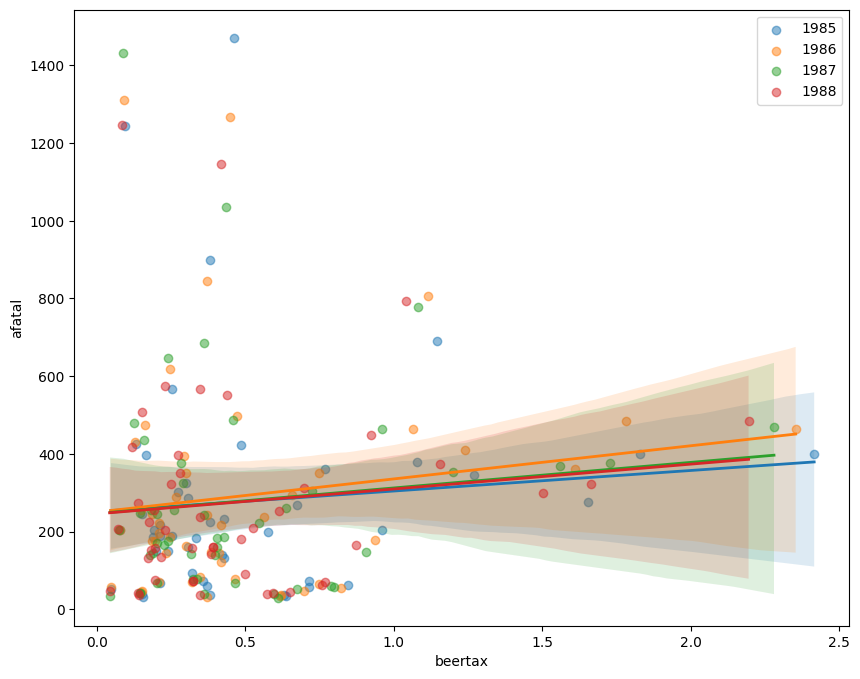

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

df_filtered = df[df['year'] > 1984]
years = df_filtered['year'].unique()

plt.figure(figsize=(10, 8))

for year in years:
    sns.regplot(x='beertax', y='afatal', data=df_filtered[df_filtered['year'] == year], 
                scatter_kws={'alpha':0.5}, line_kws={'linewidth':2}, label=year)

plt.legend()
plt.show()

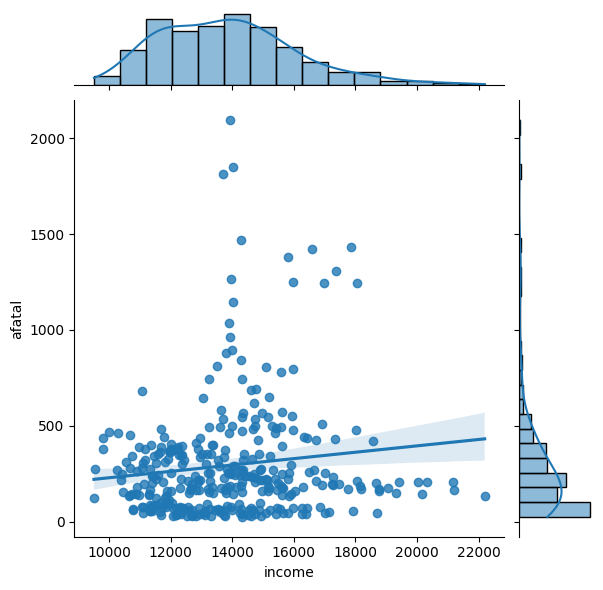

In [18]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# df_filtered = df[df['year'] > 1984]
# years = df_filtered['year'].unique()

# plt.figure(figsize=(10, 8))

# for year in years:
#     sns.regplot(x='income', y='afatal', data=df_filtered[df_filtered['year'] == year], 
#                 scatter_kws={'alpha':0.5}, line_kws={'linewidth':2}, label=year)

# plt.legend()
# plt.show()

import seaborn as sns

sns.jointplot(x='income', y='afatal', data=df, kind='reg')

In [19]:
import statsmodels.formula.api as smf

# Create a binary variable for the post-treatment period
df['post_treatment'] = (df['year'] >= 1984).astype(int)

# Create an interaction term for each state and the post-treatment period
for state in df['state'].unique():
    df[f'{state}_post'] = (df['state'] == state).astype(int) * df['post_treatment']

# Create a formula for the regression model
formula = 'afatal ~ ' + ' + '.join(f'{state}_post' for state in df['state'].unique())

# Run the DiD analysis
model = smf.ols(formula, data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 afatal   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     9.858
Date:                Wed, 01 May 2024   Prob (F-statistic):           3.89e-38
Time:                        21:24:43   Log-Likelihood:                -2233.1
No. Observations:                 336   AIC:                             4564.
Df Residuals:                     287   BIC:                             4751.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    310.6165     20.568     15.102      0.0

In [22]:
import pandas as pd

# Assuming total_data is a pandas DataFrame
total_data_frame = df.set_index(['state', 'year'])

# Checking whether all the states have 7 years of data or not. 48 states have data from 1982-1988
state = df['state'].unique()
len(df) / 7

# Creating a dataframe with mean of the State's unemployment rate (%) from 1982-1988
UNR_state = df.groupby('state')['unemp'].mean().reset_index()
UNR_state.columns = ["State", "UNR"]

In [36]:
# Top 6 states with highest average State Unemployment rate.
UNR_state = UNR_state.sort_values('UNR', ascending=False)
top_6_UNR = UNR_state.head(6)
top_6_UNR

,State,UNR
46,wv,13.200000
15,la,11.371429
19,mi,10.771428
22,ms,10.714286
0,al,10.414286
14,ky,9.585714


In [35]:

# Top 6 states with highest Avg. Mortality rate.
MRALL_STATE = df.groupby('state')['nfatal'].mean().reset_index()
MRALL_STATE.columns = ["State", "Mortality_rate"]
MRALL_STATE = MRALL_STATE.sort_values('Mortality_rate', ascending=False)
top_6_MRALL = MRALL_STATE.head(6)
top_6_MRALL

,State,Mortality_rate
3,ca,914.857143
40,tx,841.285714
7,fl,543.000000
35,pa,411.714286
31,ny,402.571429
32,oh,391.142857


In [31]:
# Top 6 states with highest Avg. Mortality. This may be due to high population in the respective states.
ALLMORT_STATE = df.groupby('state')['fatal'].mean().reset_index()
ALLMORT_STATE.columns = ["State", "Fatality"]
ALLMORT_STATE = ALLMORT_STATE.sort_values('Fatality', ascending=False)
top_6_ALLMORT = ALLMORT_STATE.head(6)
top_6_ALLMORT

,State,Fatality
3,ca,5045.000000
40,tx,3692.428571
7,fl,2818.857143
31,ny,2145.000000
35,pa,1835.714286
32,oh,1669.857143


In [33]:
# Correlation between 'pop' and 'allmort'
correlation = total_data_frame['pop'].corr(total_data_frame['fatal'])

# Top 6 states with highest Avg. Per Capita Pure Alcohol Consumption (Annual, Gallons)
alchl_con = total_data_frame.groupby('state')['spirits'].mean().reset_index()
alchl_con.columns = ["State", "Spirits"]
alchl_con = alchl_con.sort_values('Spirits', ascending=False)
top_6_alchl_con = alchl_con.head(6)
top_6_alchl_con

,State,Spirits
30,nv,4.388572
27,nh,4.264286
6,de,2.492857
5,ct,2.344286
16,ma,2.335714
7,fl,2.297143


In [43]:
# considering all the data irrspective of states, the below OLS models provide high R-squared values
# which implies that the variance of the whole dataset is being explained by the below models 
# model_ols_2 is the best model having the least AIC and BIC values along with higher R-squared value.

import statsmodels.formula.api as smf

# considering all the data irrespective of states, the below OLS models provide high R-squared values
# which implies that the variance of the whole dataset is being explained by the below models 
# model_ols_2 is the best model having the least AIC and BIC values along with higher R-squared value.

model_ols = smf.ols(formula='fatal ~ dry + beertax + jail + afatal + drinkage + unemp + income + nfatal + service', data=total_data_frame).fit()
print(model_ols.summary())

# statistically insignificant variables are dropped from the above model



                            OLS Regression Results                            
Dep. Variable:                  fatal   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     1135.
Date:                Wed, 01 May 2024   Prob (F-statistic):          1.24e-239
Time:                        22:33:32   Log-Likelihood:                -2171.9
No. Observations:                 335   AIC:                             4364.
Df Residuals:                     325   BIC:                             4402.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -306.2195    242.757     -1.

In [44]:
model_ols_1 = smf.ols(formula='fatal ~ dry + unemp + nfatal + beertax + service', data=total_data_frame).fit()
print(model_ols_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  fatal   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     1889.
Date:                Wed, 01 May 2024   Prob (F-statistic):          7.83e-240
Time:                        22:33:37   Log-Likelihood:                -2186.7
No. Observations:                 335   AIC:                             4385.
Df Residuals:                     329   BIC:                             4408.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         85.1524     30.382      2.

In [47]:
model_ols_2 = smf.ols(formula='fatal ~  dry + unemp + nfatal + beertax + service + pop1517 + pop1820', data=total_data_frame).fit()
model_ols_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  fatal   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     1693.
Date:                Wed, 01 May 2024   Prob (F-statistic):          1.32e-252
Time:                        22:40:15   Log-Likelihood:                -2148.8
No. Observations:                 335   AIC:                             4314.
Df Residuals:                     327   BIC:                             4344.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         44.6810     27.646      1.616      0.107      -9.705      99.067
service[T.yes]    91.5654     22.116      4.140      0.000      48.058     135.073
dry                3.6062      0.922      3.913      0.000       1.793       5.419
unemp            -14.7153      3.373     -4.363      0.000     -21.351      -8.080
nfatal             3.7623      0.132     28.518      0.000       3.503       4.022
beertax          115.5885     17.892      6.460      0.000      80.390     150.787
pop1517           -0.0017      0.001     -3.321      0.001      -0.003      -0.001
pop1820            0.0024      0.000      5.036      0.000       0.001       0.003
==============================================================================
Omnibus:                      100.608   Durbin-Watson:                   0.719
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              836.814
Skew:                           0.987   Prob(JB):                    1.94e-182
Kurtosis:                      10.487   Cond. No.                     1.67e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

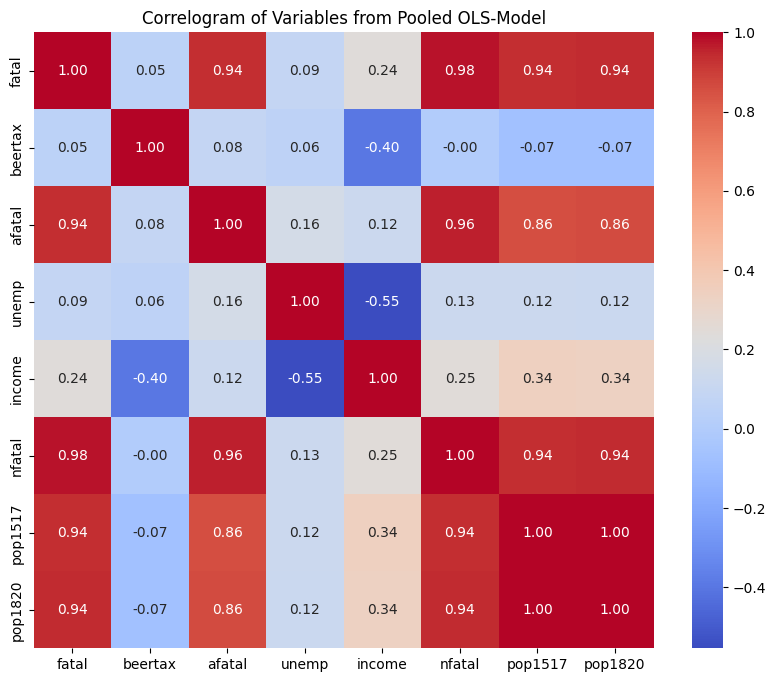

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# new dataframe with the variables from final model, model_fixed_1 
model_corr = total_data_frame[["fatal", "beertax", "afatal", "unemp", "income", "nfatal", "pop1517", "pop1820"]]

# Generating correlation matrix with all the variables
corr_all = model_corr.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_all, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlogram of Variables from Pooled OLS-Model")
plt.show()

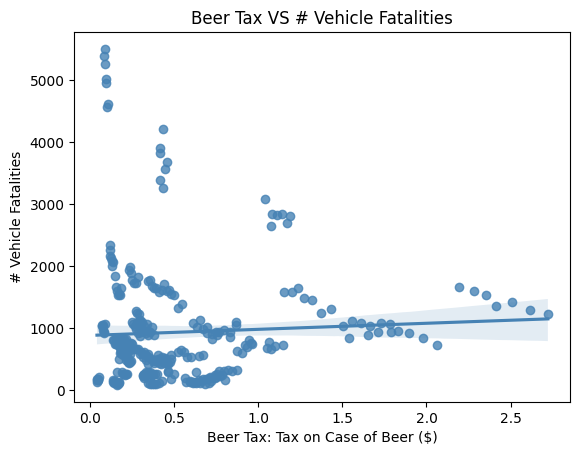

In [53]:
# Scatter plot of 'beertax' vs 'allmort'
sns.regplot(data=model_corr, x='beertax', y='fatal', color='steelblue')

# Adding labels and title
plt.xlabel('Beer Tax: Tax on Case of Beer ($)')
plt.ylabel('# Vehicle Fatalities')
plt.title('Beer Tax VS # Vehicle Fatalities')
plt.show()

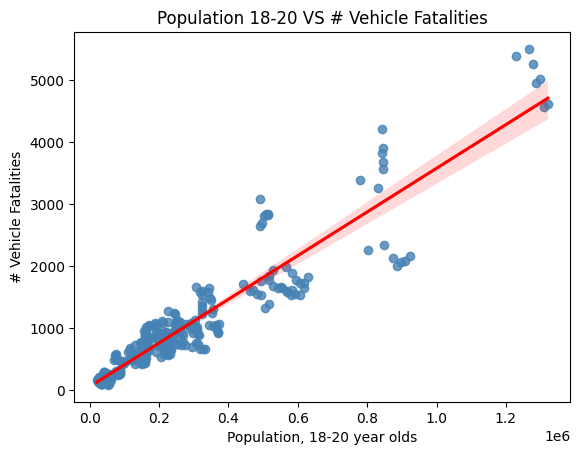

In [54]:
# Scatter plot with regression line of 'pop1820' vs 'allmort'
sns.regplot(data=model_corr, x='pop1820', y='fatal', scatter_kws={'color': 'steelblue'}, line_kws={'color': 'red'})

# Adding labels and title
plt.xlabel('Population, 18-20 year olds')
plt.ylabel('# Vehicle Fatalities')
plt.title('Population 18-20 VS # Vehicle Fatalities')

plt.show()

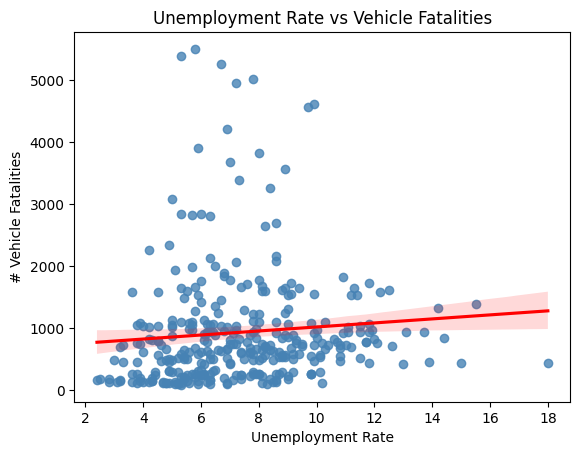

In [55]:
# Scatter plot with regression line of 'unrate' vs 'allmort'
sns.regplot(data=model_corr, x='unemp', y='fatal', scatter_kws={'color': 'steelblue'}, line_kws={'color': 'red'})

# Adding labels and title
plt.xlabel('Unemployment Rate')
plt.ylabel('# Vehicle Fatalities')
plt.title('Unemployment Rate vs Vehicle Fatalities')

plt.show()

In [58]:
df.columns

Index(['rownames', 'state', 'spirits', 'unemp', 'income', 'emppop', 'beertax',
       'baptist', 'mormon', 'drinkage', 'dry', 'youngdrivers', 'miles',
       'breath', 'jail', 'service', 'fatal', 'nfatal', 'sfatal', 'fatal1517',
       'nfatal1517', 'fatal1820', 'nfatal1820', 'fatal2124', 'nfatal2124',
       'afatal', 'pop', 'pop1517', 'pop1820', 'pop2124', 'milestot', 'unempus',
       'emppopus', 'gsp', 'post_treatment', 'al_post', 'az_post', 'ar_post',
       'ca_post', 'co_post', 'ct_post', 'de_post', 'fl_post', 'ga_post',
       'id_post', 'il_post', 'in_post', 'ia_post', 'ks_post', 'ky_post',
       'la_post', 'me_post', 'md_post', 'ma_post', 'mi_post', 'mn_post',
       'ms_post', 'mo_post', 'mt_post', 'ne_post', 'nv_post', 'nh_post',
       'nj_post', 'nm_post', 'ny_post', 'nc_post', 'nd_post', 'oh_post',
       'ok_post', 'or_post', 'pa_post', 'ri_post', 'sc_post', 'sd_post',
       'tn_post', 'tx_post', 'ut_post', 'vt_post', 'va_post', 'wa_post',
       'wv_post', 'wi_post',